In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
edges = pd.read_csv('political-books-edges.csv')
nodes = pd.read_csv('political-books-nodes.csv')

G_books = nx.Graph()

# Додавання вершин
for _, row in nodes.iterrows():
    G_books.add_node(row['Id'], label=row['Label'], ideology=row['political_ideology'])

# Додавання ребер
for _, row in edges.iterrows():
    G_books.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print(f"Кількість вершин: {G_books.number_of_nodes()}")
print(f"Кількість ребер: {G_books.number_of_edges()}")

Кількість вершин: 105
Кількість ребер: 441


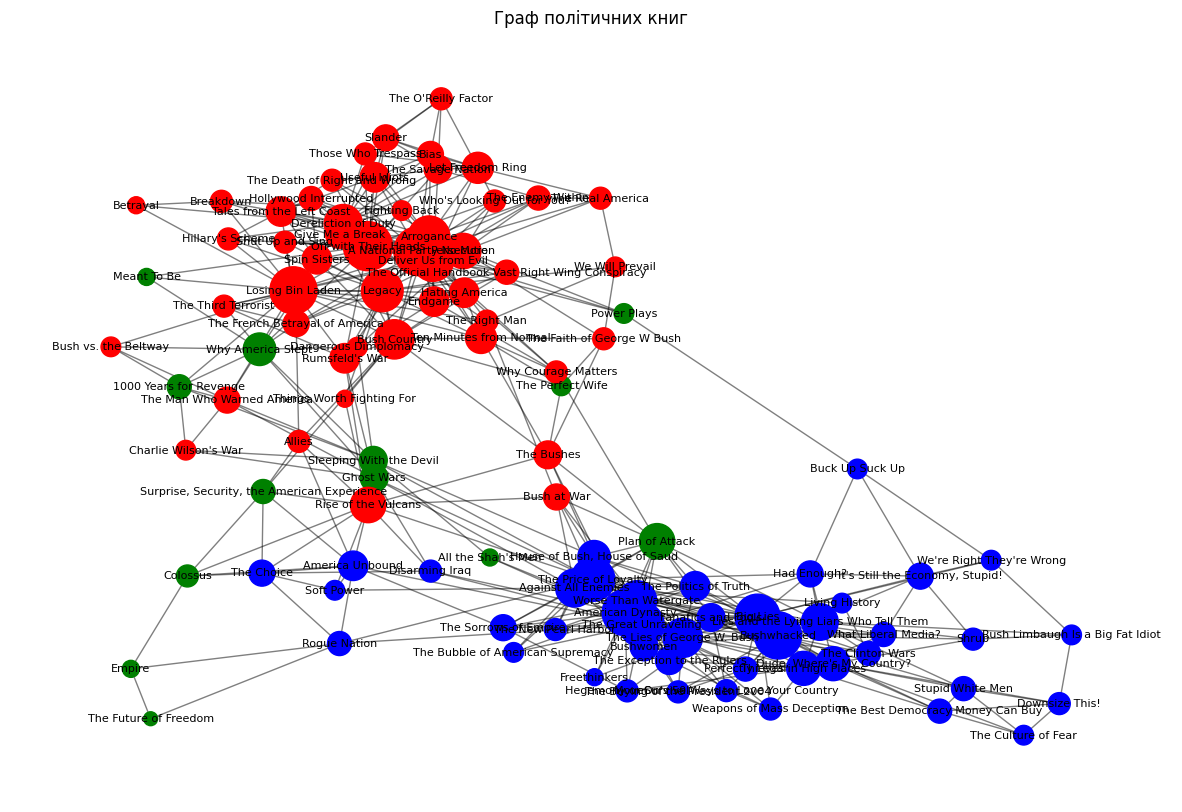

In [9]:
color_map = {
    'conservative': 'red',
    'liberal': 'blue',
    'neutral': 'green'
}
colors = [color_map[G_books.nodes[n]['ideology']] for n in G_books.nodes()]

# Визначення розмірів вершин за ступенем
degrees = dict(G_books.degree())
node_sizes = [v * 50 for v in degrees.values()]

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_books, seed=42)
nx.draw_networkx_nodes(G_books, pos, node_size=node_sizes, node_color=colors)
nx.draw_networkx_edges(G_books, pos, alpha=0.5)
nx.draw_networkx_labels(G_books, pos, labels={n: G_books.nodes[n]['label'] for n in G_books.nodes()}, font_size=8)
plt.title("Граф політичних книг")
plt.axis('off')
plt.show()

In [10]:
# Ступінь центральності
degree_centrality = nx.degree_centrality(G_books)

# Betweenness центральність
betweenness_centrality = nx.betweenness_centrality(G_books)

# Коефіцієнт кластеризації
clustering_coefficient = nx.clustering(G_books)

print("Топ-5 вершин за ступенем центральності:")
print(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nТоп-5 вершин за betweenness центральністю:")
print(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nСередній коефіцієнт кластеризації:")
print(sum(clustering_coefficient.values()) / len(clustering_coefficient))

Топ-5 вершин за ступенем центральності:
[(8, 0.2403846153846154), (12, 0.2403846153846154), (3, 0.22115384615384617), (84, 0.22115384615384617), (72, 0.21153846153846156)]

Топ-5 вершин за betweenness центральністю:
[(30, 0.13947827864287202), (49, 0.10364920953531946), (9, 0.09839490722763909), (12, 0.09526168061799924), (72, 0.09093422527408519)]

Середній коефіцієнт кластеризації:
0.4875267912317313


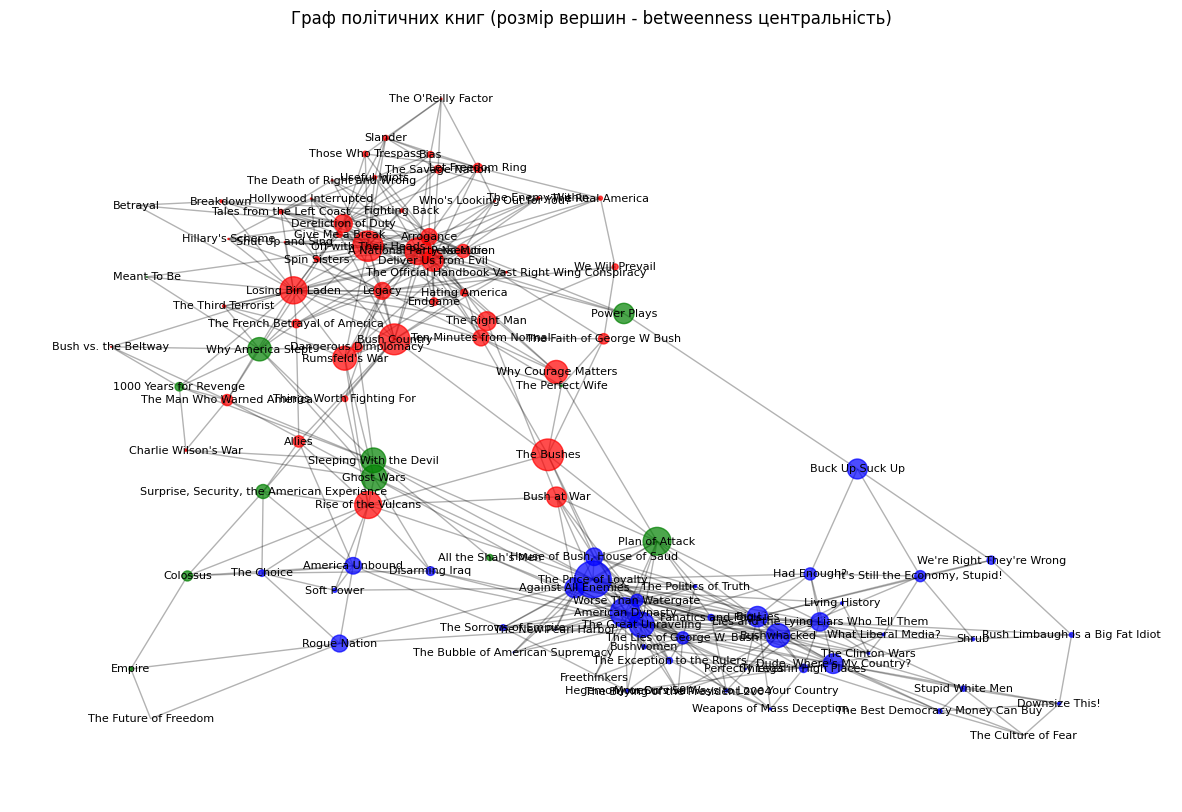

In [11]:
plt.figure(figsize=(15, 10))
node_sizes = [v * 5000 for v in betweenness_centrality.values()]
nx.draw_networkx_nodes(G_books, pos, node_size=node_sizes, node_color=colors, alpha=0.7)
nx.draw_networkx_edges(G_books, pos, alpha=0.3)
nx.draw_networkx_labels(G_books, pos, labels={n: G_books.nodes[n]['label'] for n in G_books.nodes()}, font_size=8)
plt.title("Граф політичних книг (розмір вершин - betweenness центральність)")
plt.axis('off')
plt.show()

In [12]:
print("Аналіз графу політичних книг:")
print("- Граф показує зв'язки між книгами, які часто купуються разом")
print("- Консервативні книги (червоні) утворюють щільне ядро")
print("- Ліберальні книги (сині) мають менше зв'язків між собою")
print("- Книги з високою betweenness центральністю є 'мостами' між різними ідеологічними групами")
print("- Центральні книги можуть бути популярними або базовими для різних ідеологій")

Аналіз графу політичних книг:
- Граф показує зв'язки між книгами, які часто купуються разом
- Консервативні книги (червоні) утворюють щільне ядро
- Ліберальні книги (сині) мають менше зв'язків між собою
- Книги з високою betweenness центральністю є 'мостами' між різними ідеологічними групами
- Центральні книги можуть бути популярними або базовими для різних ідеологій


In [13]:
nodes_dining = pd.read_csv('Dining-table_partners [Nodes].csv')
edges_dining = pd.read_csv('Dining-table_partners [Edges].csv')

G_dining = nx.DiGraph()

# Додавання вершин
for _, row in nodes_dining.iterrows():
    G_dining.add_node(row['Id'], label=row['Label'])

# Додавання ребер
for _, row in edges_dining.iterrows():
    G_dining.add_edge(row['Source'], row['Target'], weight=row['Weight'])

print(f"Кількість вершин: {G_dining.number_of_nodes()}")
print(f"Кількість ребер: {G_dining.number_of_edges()}")

Кількість вершин: 26
Кількість ребер: 52


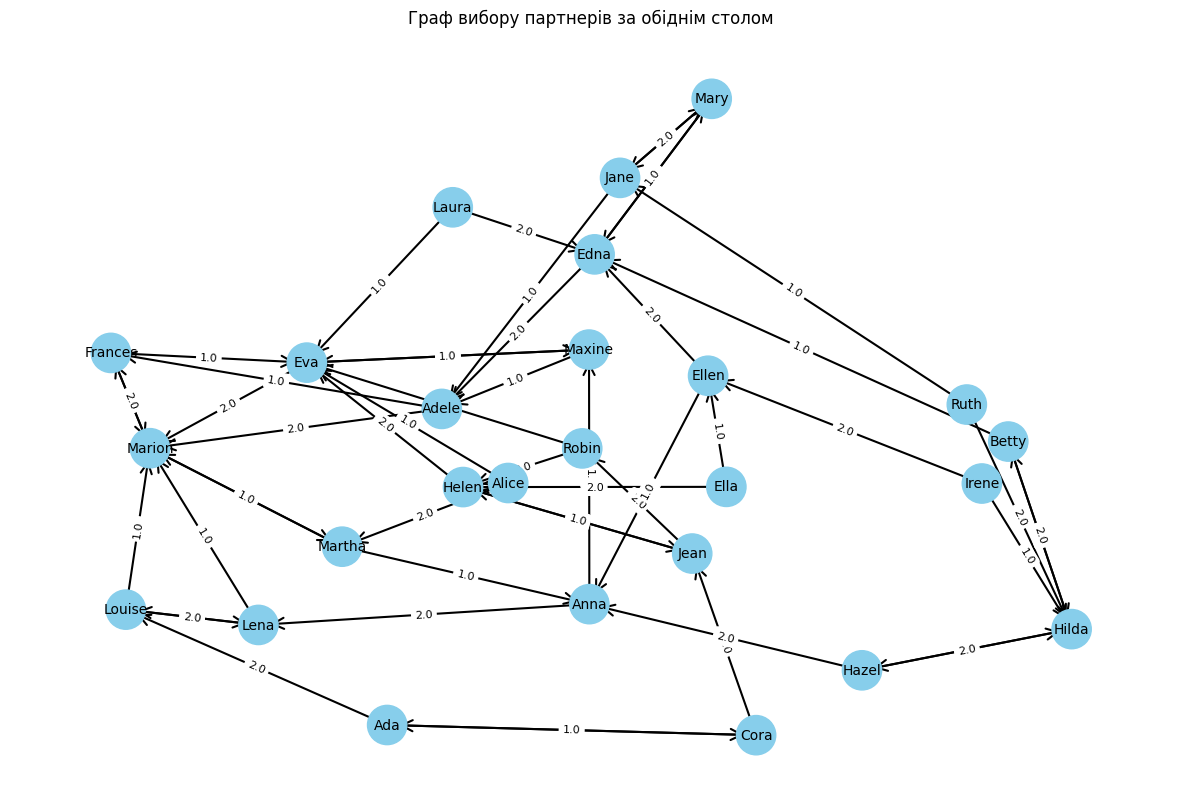

In [14]:
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_dining, seed=42)

colors = ['skyblue' for _ in G_dining.nodes()]

nx.draw_networkx_nodes(G_dining, pos, node_color=colors, node_size=800)
nx.draw_networkx_edges(G_dining, pos, arrowstyle='->', arrowsize=20, width=1.5)
nx.draw_networkx_labels(G_dining, pos, labels={n: G_dining.nodes[n]['label'] for n in G_dining.nodes()}, font_size=10)

# Додавання ваг ребер
edge_labels = {(u, v): d['weight'] for u, v, d in G_dining.edges(data=True)}
nx.draw_networkx_edge_labels(G_dining, pos, edge_labels=edge_labels, font_size=8)

plt.title("Граф вибору партнерів за обіднім столом")
plt.axis('off')
plt.show()

In [15]:
# Обчислення вхідного ступеня (кількість виборів)
in_degrees = dict(G_dining.in_degree(weight='weight'))

# Знаходження вершини з максимальним вхідним ступенем
best_partner = max(in_degrees.items(), key=lambda x: x[1])
best_partner_id, best_partner_score = best_partner
best_partner_name = G_dining.nodes[best_partner_id]['label']

print(f"Найкраща сусідка за столом: {best_partner_name} (ID: {best_partner_id})")
print(f"Кількість виборів: {best_partner_score}")

Найкраща сусідка за столом: Marion (ID: 9)
Кількість виборів: 10.0


In [16]:
# Обчислення параметрів
pagerank = nx.pagerank(G_dining)
betweenness = nx.betweenness_centrality(G_dining)
clustering = nx.clustering(G_dining.to_undirected())

print("Топ-5 вершин за PageRank:")
print(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nТоп-5 вершин за betweenness центральністю:")
print(sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5])

print("\nСередній коефіцієнт кластеризації:")
print(sum(clustering.values()) / len(clustering))

Топ-5 вершин за PageRank:
[(9, 0.23285988006162917), (14, 0.1487492905134213), (15, 0.09289623728330257), (6, 0.07501577365999641), (11, 0.05108158085903622)]

Топ-5 вершин за betweenness центральністю:
[(9, 0.1330555555555556), (20, 0.10916666666666668), (15, 0.08583333333333334), (6, 0.07916666666666668), (18, 0.07250000000000001)]

Середній коефіцієнт кластеризації:
0.11776556776556776


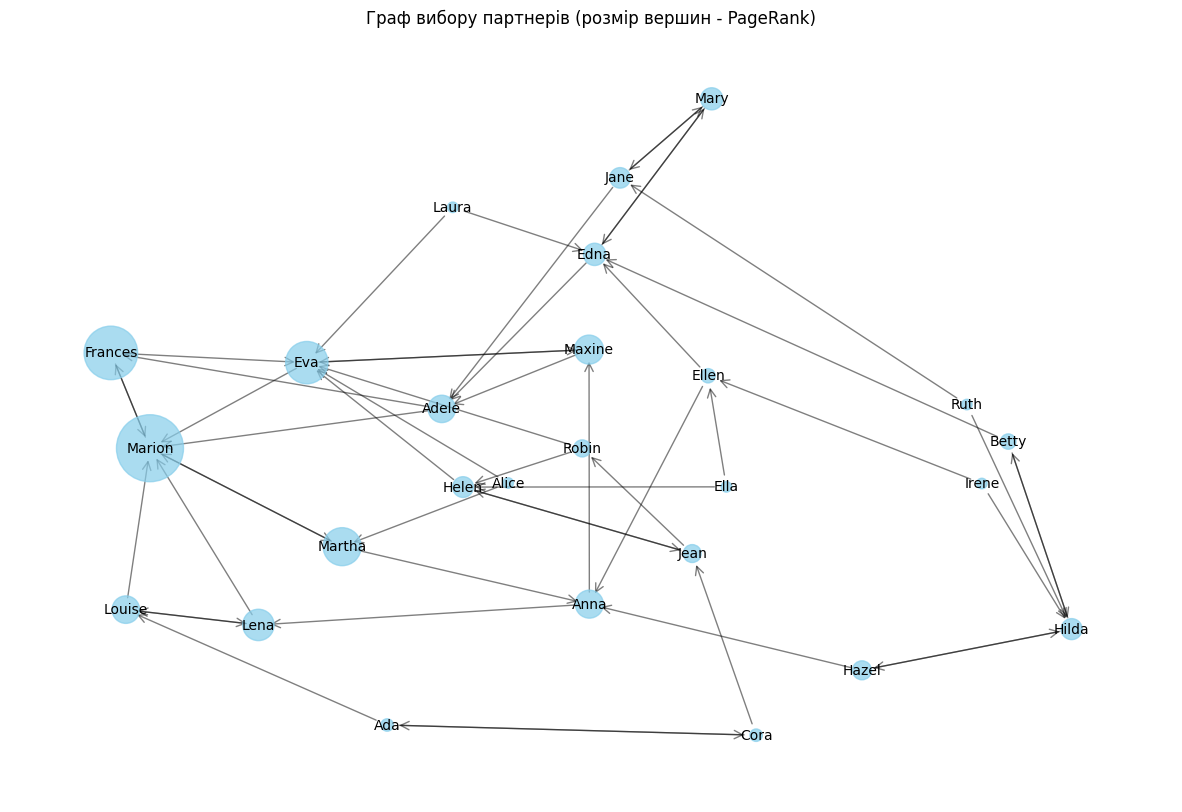

In [17]:
plt.figure(figsize=(15, 10))
node_sizes = [v * 10000 for v in pagerank.values()]
nx.draw_networkx_nodes(G_dining, pos, node_size=node_sizes, node_color=colors, alpha=0.7)
nx.draw_networkx_edges(G_dining, pos, arrowstyle='->', arrowsize=15, width=1, alpha=0.5)
nx.draw_networkx_labels(G_dining, pos, labels={n: G_dining.nodes[n]['label'] for n in G_dining.nodes()}, font_size=10)
plt.title("Граф вибору партнерів (розмір вершин - PageRank)")
plt.axis('off')
plt.show()

In [18]:
print("Аналіз графу вибору партнерів:")
print(f"- Найпопулярніша дівчина: {best_partner_name} (отримала {best_partner_score} виборів)")
print("- Вершини з високим PageRank є 'центром уваги' в мережі")
print("- Вершини з високою betweenness центральністю є важливими 'посередниками'")
print("- Кластеризація показує, наскільки друзі дівчат пов'язані між собою")

Аналіз графу вибору партнерів:
- Найпопулярніша дівчина: Marion (отримала 10.0 виборів)
- Вершини з високим PageRank є 'центром уваги' в мережі
- Вершини з високою betweenness центральністю є важливими 'посередниками'
- Кластеризація показує, наскільки друзі дівчат пов'язані між собою
